# Chương 3: Giải phương trình đại số, phương trình siêu việt 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import sin
from time import time

x0 = -1; xf = 1; 
N = 1000
I = np.linspace(x0,xf,N);
y0 = -2; yf = 2;

# Ta giai phuong trinh x^2 + x - 1 = 0
f = lambda x: x**2 + x - 1

plt.plot(I,f(I),'-b',linewidth=2)
plt.grid()
plt.title("Do thi ham so f(x)=x**2 + x - 1")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(("f(x)"))
plt.axis((x0,xf,y0,yf))
plt.show(1)

tol = 1e-6;

tic = time()

# The increment search method could be very slow, depending on x0, xf
#N = 1000000;   # 1,000,000 inside points

# or faster if we reduce the interval
x0 = 0.5; xf = 0.75
N = 100000;   # 100,000 inside points

I = np.linspace(x0,xf,N);
for i in range(len(I)):
    if abs(f(I[i])) <= tol:
    # if f(I[i])==0:
        print('The solution is: ',I[i])
        break

toc = time()
print("Processing time ---- ",toc-tic)

# Phương pháp phân đôi (bisection method)

In [ ]:
def bisection(f,a,b,tol):    
    from numpy import sign
    from math import log2
    
    x0 = a; x1 = b;
    f0 = f(x0); f1 = f(x1);
    
    nmax = log2((b-a)/tol);    # Tuc la (b-a)/2^nmax <= tol
    print("nmax la --- ",nmax)
    
    i = 1;
    
    while (i < nmax) :
        if f0 == 0:
            print("No la --- ",x0);
            break
        elif f1 == 0 :            
            print("No la --- ",x1);
            break
        else:
            x2 = (x0+x1)/2.0; 
            f2 = f(x2);
            if sign(f0) != sign(f2):
                x1 = x2; f1 = f2
            else:
                x0 = x2; f0 = f2
            i += 1 
    return x2, i


# Test the code bisection
def f(x):
    return x**2 + x - 1

tic = time()

a,b,tol = (-1,1,1e-10)
x, i = bisection(f,a,b,tol)
print(x)
#print(i)

toc = time()
print("Processing time ---- ",toc-tic)

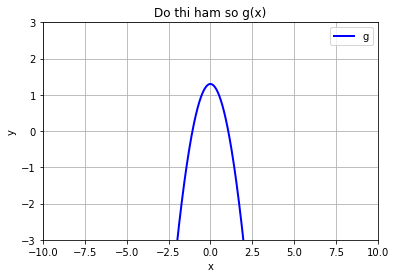

In [11]:
# Chú ý: Vẽ hình và tìm số nghiệm trước đã

from numpy import cos

# g = lambda x: x**3 - 2 * x**2 - x + 1 
g = lambda x: 1 + 0.3 * cos(x) - x**2


import matplotlib.pyplot as plt
import numpy as np
#from math import sin

# Cho khoang ban dau tu -10 den 10
I = np.linspace(-10,10,1000);

#plt.subplot(1,2,1)
plt.plot(I,g(I),'-b',linewidth=2)
plt.grid()
plt.title("Do thi ham so g(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(("g"))
plt.axis((-10,10,-3,3))
plt.show(1)

# Phương pháp lặp đơn

## Tìm khoảng tự ánh (nếu đề bài 0 cho trước)

In [ ]:
def g(x):
    return 1/2 * (x+5/x)

def dg(x):    
    return 1/2 - 5/(2 * x**2)

import matplotlib.pyplot as plt
import numpy as np
#from math import sin

# Cho khoang ban dau tu 0.5 den 3.5
I = np.linspace(2,3,1000);

#plt.subplot(1,2,1)
plt.plot(I,g(I),'-b',I,dg(I),'-.r',linewidth=2)
plt.grid()
plt.title("Do thi ham so g(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(("g","dg"))
plt.axis((0.5,3.5,-3,3))
plt.show(1)

from numpy import abs, max
lb = max(abs(dg(I)))
print(lb)

In [ ]:
def g(x):
    from numpy import exp
    return exp(-x)

def dg(x): 
    from numpy import exp
    return -exp(-x)

import matplotlib.pyplot as plt
import numpy as np
#from math import sin

# Cho khoang ban dau tu 0.5 den 3.5
I = np.linspace(0,1,1000);

#plt.subplot(1,2,1)
plt.plot(I,g(I),'-b',I,abs(dg(I)),'-.r',linewidth=2)
plt.grid()
plt.title("Do thi ham so g(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(("g","dg"))
plt.axis((0.1,3.5,-3,3))
plt.show(1)

from numpy import abs, max
lb = max(abs(dg(I)))
print(lb)

In [ ]:
# Giai phuong trinh f(x)=0 nhung duoc viet duoi dang moi  x= g(x)
"""
g : ham so, x0: gia tri ban dau, bat ky
nmax : so luong toi da cac phep lap, tol: sai so
x0 : nghiem, i: so luong phep lap thuc te de dat duoc sai so tol
"""
def lapdon(g,x0,nmax,tol):    
    i = 1;
    
    for i in range(nmax):
        x1 = g(x0); 
        g1 = g(x1);
        if abs(x1-g1)>tol :
            x0 = x1;
            x1 = g(x1);
            g1 = g(x1);
            i += 1;
        else:
            print("No la ---",x1);
            break
        if i>nmax:
            print("Co the phep lap don nay 0 cho ket qua")
            x1 = None;
    return x1, i

# Test code
from numpy import exp, arctan

#def g(x): return exp(-x)  # Bai tap 6a Exercise sheet No 34
def g(x): return 1+arctan(x)  # Bai tap 6b Exercise sheet No 34

#x0,nmax,tol = (0,100,1e-6)
#c, i = lapdon(g,x0,nmax,tol)
#print("No la ---",c)
#print("So lan lap la ---",i)



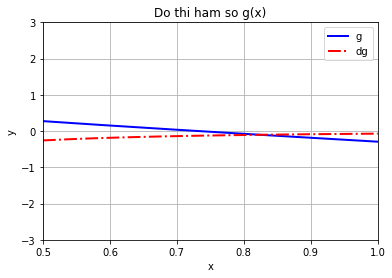

0.25819888974716115


In [2]:
f = lambda x: 1 + 4*x - 10*x**3

def g(x):
    from numpy import sqrt
    return sqrt((1 + 4*x)/(10*x)) -x

def dg(x):
    from numpy import sqrt
    u = sqrt(0.1 * 1/x + 0.4) 
    return (-0.1/x**2)/(2*u) 

import matplotlib.pyplot as plt
import numpy as np
#from math import sin

# Cho khoang ban dau tu 0.5 den 1
I = np.linspace(0.5,1,1000);

#plt.subplot(1,2,1)
plt.plot(I,g(I),'-b',I,dg(I),'-.r',linewidth=2)
plt.grid()
plt.title("Do thi ham so g(x)")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(("g","dg"))
plt.axis((0.5,1,-3,3))
plt.show(1)

from numpy import abs, max
lb = max(abs(dg(I)))
print(lb)

In [9]:
print(dg(0.5))
print(dg(0.9))

-0.25819888974716115
-0.08634303780002904


In [36]:
A = np.array([0, 1, 2, -1]) 

from numpy import exp
f = lambda x: np.log(0.18*x*3+0.2*x**2+0.19*x+0.85)

print(f(A))

[-0.16251893  0.57661336  1.13462273 -1.13943428]


In [40]:
b = np.array([-0.1625,  0.5766,  1.1346, -1.1394])
tb = 10**b

from numpy import polyfit
print(polyfit(A,tb,3))

from scipy.interpolate import lagrange
poly = lagrange(A, tb)
print(poly)

[0.71792784 1.23453493 1.13192326 0.68785991]
        3         2
0.7179 x + 1.235 x + 1.132 x + 0.6879
